# Basics of Jupyter Notebooks

If you haven't done so already, please fetch the source from GitHub:

```bash
$ ssh <username>@tegner.pdc.kth.se
$ cd /cfs/klemming/nobackup/<initial>/<username>/prace-jupyter
$ git clone https://github.com/PDC-support/jupyter-notebook.git
```

While we are still exploring how Jupyter works we can work on the login node (please don't run anything demanding!).  

Make sure that you have set a Jupyter password and generated an SSL certificate (and added corresponding options in the config file). Then launch a Jupyter server in your `prace-jupyter` directory:

```bash
$ module load anaconda/py36/5.0.1
$ source activate prace
$ ipnport=$(shuf -i8000-9999 -n1)
$ ipnip=$(hostname -i)
$ jupyter-notebook --no-browser --port=$ipnport --ip=$ipnip
```

Then look at the output and find the line containing `https://<IP.address>:<port>/`. 
Copy/paste this URL into your local browser and enter your password. You should now be connected to the Jupyter server. 

## Navigating Jupyter notebooks
 - Notebook Dashboard
   * `Files` tab shows files in current directory
   * `Running` tab shows kernels running on your computer
   * `Clusters` tab lets you launch kernels for parallel computing
 - Fully-fledged terminal (you can run emacs and vi)
 - Text editor for source code in many different languages  
 

## Cells

- **Markdown cells** contain formatted text written in Markdown 
- **Code cells** contain code to be interpreted by the *kernel* (Python, R, Julia, Octave/Matlab...)

![Components](img/notebook_components.png)

### Markdown cells

This cell contains simple [markdown](https://daringfireball.net/projects/markdown/syntax), a simple language for writing text that can be automatically converted to other formats, e.g. HTML, LaTeX or any of a number of others.

**Bold**, *italics*, **_combined_**, ~~strikethrough~~, `inline code`.

* bullet points

or

1. numbered
3. lists

**Equations:**   
inline $e^{i\pi} + 1 = 0$
or on new line  
$$e^{i\pi} + 1 = 0$$

Images ![Beskow](https://www.pdc.kth.se/polopoly_fs/1.771286!/image/Beskow%20front%20row%20no%20floor%20from%20right_670pW_300pH_72ppi_KTH_l_grey_to_tranps_bg.jpg)

Links:  
[One of many markdown cheat-sheets](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#emphasis)


### Code cells

In [1]:
# a code cell can run statements of code.
# when you run this cell, the output is sent 
# from the web page to a back-end process, run 
# and the results are displayed to you
print("hello world")

hello world


## Advantages of Jupyter Notebooks
- Excels at [literate programming](https://en.wikipedia.org/wiki/Literate_programming)
- Many features of integrated development environment (IDE): code completion, easy access to help
- [Support for many programming languages](https://github.com/jupyter/jupyter/wiki/Jupyter-kernels)

## Working with notebooks

### Some Jupyter features
- Toggle between code and markdown cells
- Edit mode and Command mode
- Executing a cell
- Inserting, copying, pasting and removing cells
- Execution order - prompt numbers
- Meaning of _
- Getting help with ?

In [2]:
# enter code here!

### Shell commands
  - You can run shell commands by prepending with !
  - Remember to make sure your cell command doesn't require interaction

In [3]:
!echo "hello"

hello


In [4]:
!module list

/bin/sh: module: command not found


### Interactive plotting

Jupyter supports interactive plotting with matplotlib and other visualization libraries (including for other languages). Matplotlib can be used with different backends, which will make the plots appear differently in the Notebook

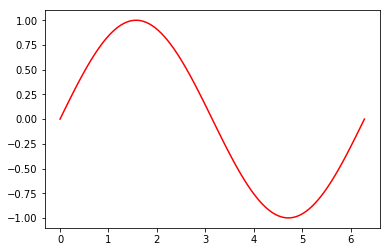

In [5]:
#%matplotlib notebook
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0,2*np.pi,100)
y = np.sin(x)
plt.plot(x,y, 'r-')
plt.show()

### Widgets

Widgets add more interactivity to Notebooks, allowing one to visualize and control changes in data, parameters etc. 

In [6]:
from ipywidgets import interact

In [7]:
@interact(x=True, y=1.0, s="Hello")
def g(x, y, s):
    return (x, y, s)

interactive(children=(Checkbox(value=True, description='x'), FloatSlider(value=1.0, description='y', max=3.0, …

### More interactive plotting using widgets

In [8]:
from ipywidgets import interact # IPython.html.widgets before IPython 4.0

@interact
def plot(n=(1,6)):
    x = np.linspace(0,2*np.pi,100)
    y = np.sin(n*x)
    plt.plot(x,y, 'r-')
    plt.show()

interactive(children=(IntSlider(value=3, description='n', max=6, min=1), Output()), _dom_classes=('widget-inte…

### Keyboard shortcuts 

Some shortcuts only work in Command or Edit mode.

* `Enter` key to enter Edit mode (`Escape` to enter Command mode)
* `Ctrl`-`Enter`: run the cell
* `Shift`-`Enter`: run the cell and select the cell below
* `Alt`-`Enter`: run the cell and insert a new cell below
* `Ctrl`-`s`: save the notebook 
* `Tab` key for code completion or indentation (Edit mode)
* `m` and `y` to toggle between Markdown and Code cells (Command mode)
* `d-d` to delete a cell (Command mode)
* `z` to undo deleting (Command mode)
* `a/b` to insert cells above/below current cell (Command mode)
* `x/c/v` to cut/copy/paste cells (Command mode)
* `Up/Down` or `k/j` to select previous/next cells (Command mode)
* `h` for help menu for keyboard shortcuts (Command mode)
* Append `?` for help on commands/methods, `??` to show source (Edit mode) 

### <font color="red"> *Exercise 1.1* </font>

Spend a couple of minutes playing around with Markdown and code cells:
1. Create a new cell below this one, and make it a Markdown cell 
2. Go to Edit mode, and add a heading along with some bullet points and an equation
3. Add another cell below, and make it a code cell
4. Add some code which returns output (either use `print()` or type the variable name at the end of the cell)
5. Try some of the keyboard shortcuts listed above

Here are some useful hints:
* You can edit the cell by double-clicking on it, or pressing `Enter` when it's selected
* You can run the cell by pressing the play-button in the toolbar, or press `Shift-Enter`
* You can change the type of the cell from the toolbar, or press `m` for Markdown and `y` for code

**Questions**
* What is the difference between executing a cell with `Shift-Enter`, `Ctrl-Enter` or `Alt-Enter`?


If you already know all this or if you want to move on:
- Go to exercise 1.2 below

### <font color="red"> *Optional: Exercise 1.2* </font>

- Execute the cell below. It fits a 5th order polynomial to a gaussian function with some random noise 
- Use the `@interact` decorator together with the function `fit`, such that you can visualize fits with polynomial orders `n` ranging from, say, 3 to 30


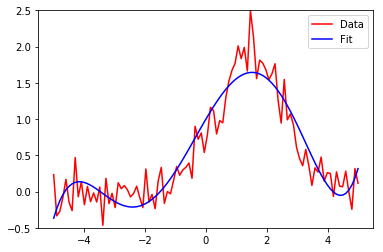

In [9]:
# gaussian function
def gauss(x,param):
    [a,b,c] = param
    return a*np.exp(-b*(x-c)**2)

# gaussian array y in interval -5<x-5 
nx = 100
x = np.linspace(-5.,5.,nx)
p = [2.0,0.5,1.5] # some parameters
y = gauss(x,p)

# add some noise
noise = np.random.normal(0,0.2,nx)
y += noise

# we fit a 5th order polynomial to it

def fit(n):
    pfit = np.polyfit(x,y,n)
    yfit = np.polyval(pfit,x)
    plt.plot(x,y,"r",label="Data")
    plt.plot(x,yfit,"b",label="Fit")
    plt.legend()
    plt.ylim(-0.5,2.5)
    plt.show()
    
# call function fit
# these lines are unnecessary when you use the interact widget
n=5
fit(n)

### Magics

Magics are a simple command language which significantly extend the power of Jupyter 

Two kinds of magics:

  - **Line magics**: commands prepended by one % character and whose arguments only extend to the end of the current line.
  - **Cell magics**: use two percent characters as a marker (%%), receive as argument the whole cell (must be used as the first line in a cell)
  - Use `%lsmagic` magic to list all available line and cell magics
  - Question mark shows help: `%lsmagic?`
  - `%quickref` gives a short reference of available magic (and other) functionality 
  - Additional magics can be created, see next notebook for Slurm magics!

In [10]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python  %%python

In [11]:
%quickref

### `%ls` and `%sx ls`

Listing files and directories, and capturing the output of shell commands

In [12]:
!ls

0-setup.ipynb          3-paralle.ipynb        img
1-intro.ipynb          cities
2-slurm-analysis.ipynb gromacs_job


In [13]:
%ls

0-setup.ipynb           3-paralle.ipynb         img/
1-intro.ipynb           cities/
2-slurm-analysis.ipynb  gromacs_job/


In [14]:
ls_out = %ls
ls_out

0-setup.ipynb           3-paralle.ipynb         img/
1-intro.ipynb           cities/
2-slurm-analysis.ipynb  gromacs_job/


In [15]:
%sx?

In [16]:
ls_out = %sx ls
ls_out

['0-setup.ipynb',
 '1-intro.ipynb',
 '2-slurm-analysis.ipynb',
 '3-paralle.ipynb',
 'cities',
 'gromacs_job',
 'img']

### `%timeit`
- Timing execution
- Both Line and Cell level

In [17]:
%timeit import time ; time.sleep(1)

1 s ± 746 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [18]:
import numpy as np

In [19]:
%%timeit 
a = np.random.rand(100, 100)
np.linalg.eigvals(a)

4.33 ms ± 434 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### `%%writefile`
Writes the cell contents as a named file

In [20]:
%%writefile foo.py
print('Hello world')

Writing foo.py


### `%run` 
 - Executes python code from .py files 

In [21]:
%run foo

Hello world


<Figure size 432x288 with 0 Axes>

### `%prun`
 - Python code profiler
 - Cell or Line magic

In [22]:
%%prun 
a = np.random.rand(100, 100)
np.linalg.eigvals(a)

## Use cases
- Experimenting with new ideas, testing new libraries/databases 
- Interactive code, data analysis and visualization development
- Sharing and explaining code to colleagues
- Learning from other notebooks
- Keeping track of interactive sessions, like a digital lab notebook
- Supplementary information with published articles
- Teaching (programming, experimental/theoretical science)
- Presentations

## When not to use notebooks?

- Large codebases are difficult to manage in notebooks
- More difficult to follow good software development practices
    - doesn't play well with version control (see below)
    - not as easy to do automated testing
    - not as useful as IDE to ensure PEP8-compliance

## [JupyterHub](https://github.com/jupyterhub)

- A multi-user hub to spawn, manage and proxy multiple instances of the Jupyter Notebook server
- Purpose: supporting multiple users, who can log in and start notebooks
- Used by: student classes, corporate data science workgroup, scientific research group, high-performance computing group

## [JupyterLab](https://github.com/jupyterlab/jupyterlab)

- Natural evolution of the Jupyter Notebook user interface
- An "IDE": *Interactive* Development Environment
- Flexible user interface for assembling the building blocks of interactive computing
- Adaptable to multiple workflows. Switch between Notebook/narrative focus and script/console focus
- A stable version suitable for general usage was released in Feb. 2018

![jupyterlab](img/jlab-screenshot-nb-con-term-2_40.png)

## Lesson key points

- Keyboard shortcuts simplify using Jupyter
- Magics allow you to
 - access the filesystem
 - time, debug and profile your code
 - run shell commands in underlying system
- You can also create your own magics
- You can add inline plots, and widgets provide more interactivity
- Jupyter can run many kernels, among them Python, Octave, Julia and R (assuming they are installed on the host running Jupyter)